In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.axes_grid.parasite_axes import SubplotHost


C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_80760\2344011782.py:8: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.parasite_axes import SubplotHost


In [2]:
sns.set_style('darkgrid')

colors = ['#0FB5AE', '#4046CA', '#F68511', '#DE3D82', '#7E84FA', '#72E06A', '#147AF3', '#7326D3', '#E8C600', '#CB5D00',
          '#008F5D', '#BCE931']

In [3]:
data_df = pd.read_csv('./assets/iris-data-clean.csv')

data_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,2.3,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732
std,0.799542,0.430104,1.758720,0.762191
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  149 non-null    float64
 1   sepal_width_cm   149 non-null    float64
 2   petal_length_cm  149 non-null    float64
 3   petal_width_cm   149 non-null    float64
 4   class            149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
data_df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

Text(0.5, 1.0, 'Sepal Length')

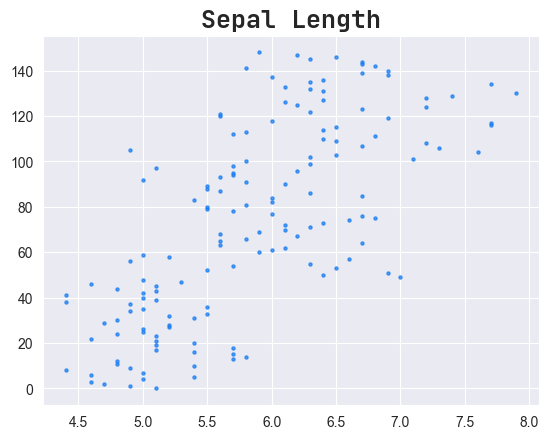

In [10]:
plt.scatter(data_df['sepal_length_cm'], data_df.index, color=colors[6], s=5, alpha=0.7)
plt.title("Sepal Length", font='JetBrains Mono', weight="700", size="18")

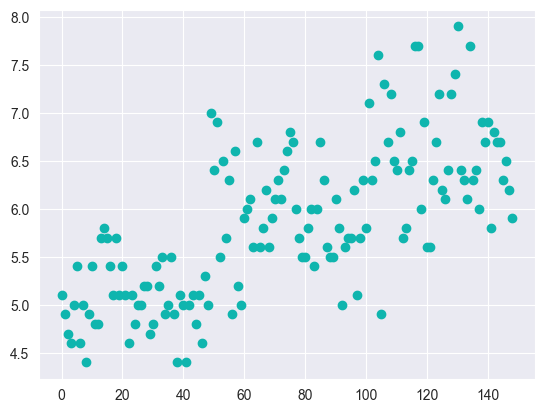

In [11]:
plt.scatter(data_df.index, data_df['sepal_length_cm'], color=colors[0])


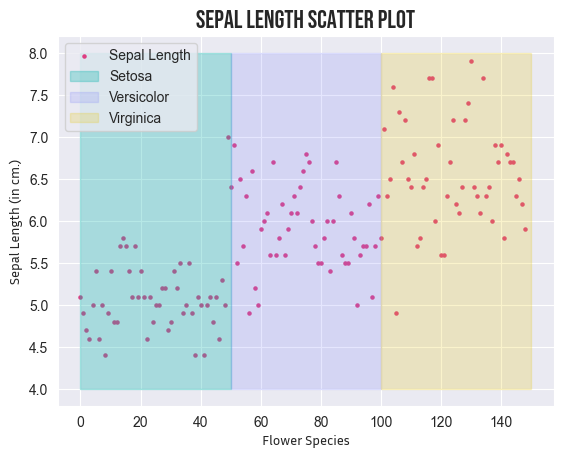

In [27]:
fig, ax = plt.subplots()

ax.scatter(data_df.index, data_df['sepal_length_cm'], color=colors[3], s=5)

ax.add_patch(Rectangle((0, 4), 50, 4, alpha=0.3, color=colors[0]))
ax.add_patch(Rectangle((50, 4), 50, 4, alpha=0.2, color=colors[4]))
ax.add_patch(Rectangle((100, 4), 50, 4, alpha=0.2, color=colors[8]))

ax.legend(["Sepal Length", "Setosa", "Versicolor", "Virginica"])

plt.xlabel("Flower Species", font="Inria Sans", weight="500")
plt.ylabel("Sepal Length (in cm.)", font="Inria Sans", weight="500")
plt.title("Sepal Length Scatter Plot", font="Bebas Neue", size="18", weight="700")

plt.show()

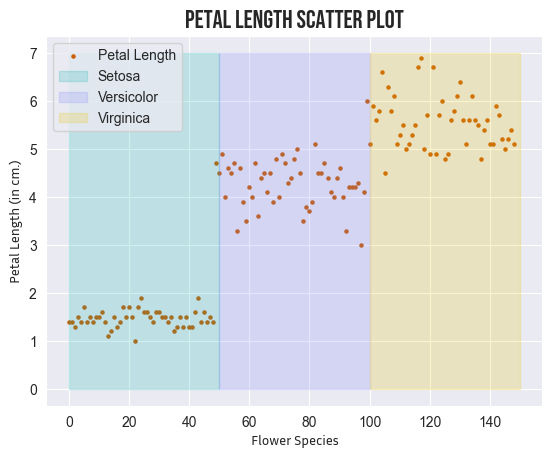

In [38]:
fig, ax = plt.subplots()

ax.scatter(data_df.index, data_df['petal_length_cm'], color=colors[9], s=5)

ax.add_patch(Rectangle((0, 0), 50, 7, alpha=0.2, color=colors[0]))
ax.add_patch(Rectangle((50, 0), 50, 7, alpha=0.2, color=colors[4]))
ax.add_patch(Rectangle((100, 0), 50, 7, alpha=0.2, color=colors[8]))

ax.legend(["Petal Length", "Setosa", "Versicolor", "Virginica"])

plt.xlabel("Flower Species", font="Inria Sans", weight="500")
plt.ylabel("Petal Length (in cm.)", font="Inria Sans", weight="500")
plt.title("Petal Length Scatter Plot", font="Bebas Neue", size="18", weight="700")

plt.show()

In [32]:
import matplotlib.font_manager as font_manager

for font in font_manager.findSystemFonts():
    font_manager.fontManager.addfont(font)

import matplotlib.font_manager

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')[:10]

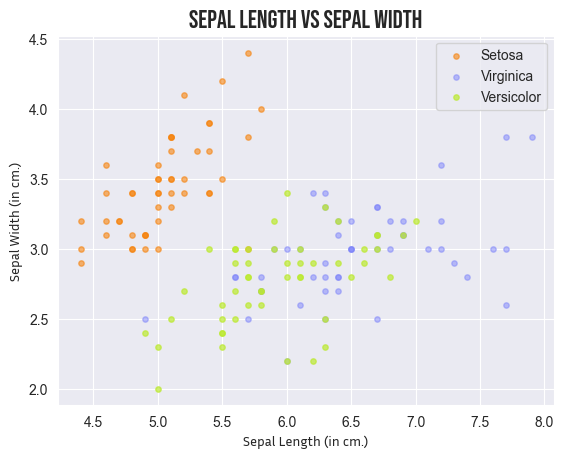

In [57]:
plt.scatter(data_df["sepal_length_cm"].loc[data_df["class"] == "Iris-setosa"],
            data_df["sepal_width_cm"].loc[data_df["class"] == "Iris-setosa"], color=colors[2], s=15, alpha=0.6)

plt.scatter(data_df["sepal_length_cm"].loc[data_df["class"] == "Iris-virginica"],
            data_df["sepal_width_cm"].loc[data_df["class"] == "Iris-virginica"], color=colors[4], s=15, alpha=0.5)

plt.scatter(data_df["sepal_length_cm"].loc[data_df["class"] == "Iris-versicolor"],
            data_df["sepal_width_cm"].loc[data_df["class"] == "Iris-versicolor"], color=colors[11], s=15, alpha=0.7)

plt.legend(["Setosa", "Virginica", "Versicolor"])
plt.xlabel("Sepal Length (in cm.)", font="Inria Sans", weight="500")
plt.ylabel("Sepal Width (in cm.)", font="Inria Sans", weight="500")
plt.title("Sepal Length vs Sepal Width", font="Bebas Neue", size="18", weight="700")

plt.show()

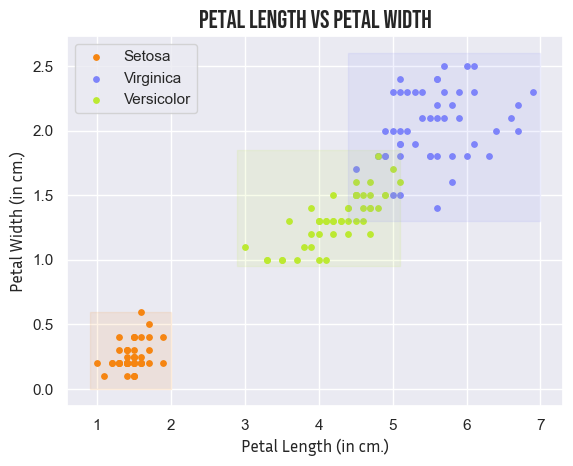

In [128]:
fig, ax = plt.subplots()

ax.scatter(data_df["petal_length_cm"].loc[data_df["class"] == "Iris-setosa"],
           data_df["petal_width_cm"].loc[data_df["class"] == "Iris-setosa"], color=colors[2], s=15, alpha=1)

ax.scatter(data_df["petal_length_cm"].loc[data_df["class"] == "Iris-virginica"],
           data_df["petal_width_cm"].loc[data_df["class"] == "Iris-virginica"], color=colors[4], s=15, alpha=1)

ax.scatter(data_df["petal_length_cm"].loc[data_df["class"] == "Iris-versicolor"],
           data_df["petal_width_cm"].loc[data_df["class"] == "Iris-versicolor"], color=colors[11], s=15, alpha=1)

ax.add_patch(Rectangle((0.9, 0), 1.1, .6, alpha=0.1, color=colors[2]))
ax.add_patch(Rectangle((2.9, 0.95), 2.2, .9, alpha=0.1, color=colors[11]))
ax.add_patch(Rectangle((4.4, 1.3), 2.6, 1.3, alpha=0.1, color=colors[4]))

plt.legend(["Setosa", "Virginica", "Versicolor"])
plt.xlabel("Petal Length (in cm.)", font="Inria Sans", weight="500")
plt.ylabel("Petal Width (in cm.)", font="Inria Sans", weight="500")
plt.title("Petal Length vs Petal Width", font="Bebas Neue", size="18", weight="700")

plt.show()

In [42]:
data_df["sepal_length_cm"].loc[data_df["class"] == "Iris-setosa"]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    5.7
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.4
42    5.0
43    5.1
44    4.8
45    5.1
46    4.6
47    5.3
48    5.0
Name: sepal_length_cm, dtype: float64

In [62]:
palette = {
    'Iris-setosa': colors[2],
    'Iris-versicolor': colors[6],
    'Iris-virginica': colors[11],
}

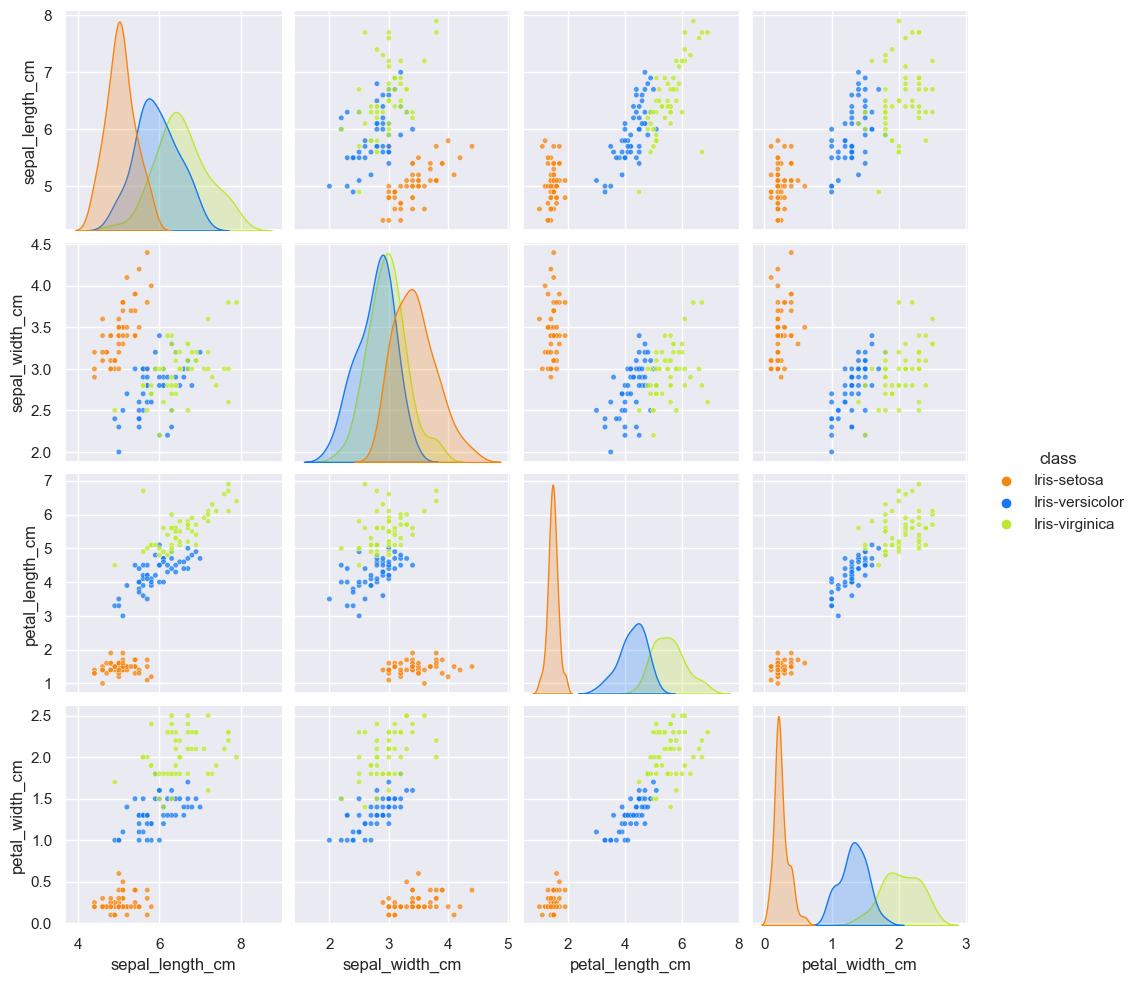

In [78]:
sns.set()
sns.pairplot(data_df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']],
             hue="class", diag_kind="kde", palette=palette, plot_kws=dict(alpha=0.75, s=15))

plt.show()

In [37]:
d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data_df['species'] = data_df['class'].replace(d)

In [6]:
data_df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,species
144,6.7,3.0,5.2,2.3,Iris-virginica,2
145,6.3,2.5,5.0,2.3,Iris-virginica,2
146,6.5,3.0,5.2,2.0,Iris-virginica,2
147,6.2,3.4,5.4,2.3,Iris-virginica,2
148,5.9,3.0,5.1,1.8,Iris-virginica,2


C:\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


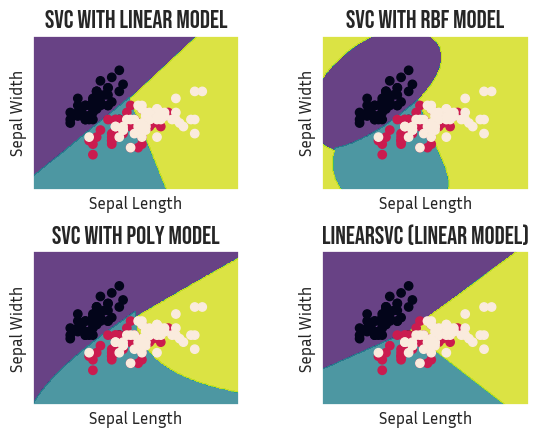

In [94]:
from sklearn import svm

X = data_df[['sepal_length_cm', 'sepal_width_cm']].values
y = data_df['species'].values

h = 0.02
c = 1.0

svc_lin = svm.SVC(kernel='linear', C=c).fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', C=c, gamma=0.7).fit(X, y)
svc_poly = svm.SVC(kernel='poly', C=c, degree=3).fit(X, y)

svc = svm.LinearSVC(C=c).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear model',
          'SVC with rbf model',
          'SVC with poly model',
          'LinearSVC (linear model)']

for i, clf in enumerate((svc_lin, svc_rbf, svc_poly, svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    plt.scatter(X[:, 0], X[:, 1], c=y * 100)
    plt.xlabel('Sepal Length', font="Inria Sans", weight="500")
    plt.ylabel('Sepal Width', font="Inria Sans", weight="500")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i], font="Bebas Neue", weight="700", size=18)

plt.show()

In [40]:
from sklearn.model_selection import train_test_split

X = data_df.drop(['class', 'species'], axis=1)
y = data_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
X_train.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
50,6.4,3.2,4.5,1.5
76,6.7,3.0,5.0,1.7
112,5.7,2.5,5.0,2.0
54,5.7,2.8,4.5,1.3
138,6.9,3.1,5.4,2.1


In [9]:
y_train.head()

50     1
76     1
112    2
54     1
138    2
Name: species, dtype: int64

In [152]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [153]:
y_hat = svm.predict(X_test)
y_hat[:5]

array([1, 0, 2, 2, 1], dtype=int64)

In [154]:
print(f"Accuracy of the SVM model is : {svm.score(X_test, y_test) * 100}%")

Accuracy of the SVM model is : 93.33333333333333%


In [155]:
import pickle

pickle.dump(svm, open("SVM_Model.sav", "wb"))

In [156]:
savedModel = pickle.load(open("SVM_Model.sav", 'rb'))

savedModel.predict([[6.0, 2.2, 4.0, 1.0]])

C:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()

In [82]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
dt.predict([[6.0, 2.2, 4.0, 1.0]])

array([1.], dtype=float32)

In [84]:
y_hat = dt.predict(X_test)

accuracy_score(y_test, y_pred=y_hat) * 100
print(y_hat[:5])

[0. 2. 0. 0. 1.]


C:\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [85]:
print(f"Accuracy of the Decision Tree model is : {round(accuracy_score(y_test, y_hat) * 100, 3)}")

Accuracy of the Decision Tree model is : 100.0


In [86]:
data_df.columns[:-2]

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm'],
      dtype='object')

In [87]:
data_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [100]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=DecisionTreeClassifier(),
    X=X_train,
    y=y_train,
    scoring='neg_mean_squared_error')

TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [101]:
X_train

<tf.Tensor: shape=(149, 4), dtype=float32, numpy=
array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.25],
       [4.4 , 2.9 , 1.4 , 0.25],
       [4.9 , 3.1 , 1.5 , 0.25],
       [5.4 , 3.7 , 1.5 , 0.25],
       [4.8 , 3.4 , 1.6 , 0.25],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [5.7 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.4 , 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [5.4 , 3.4 , 1.7 , 0.2 ],
       [5.1 , 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.5 , 1.5 , 0.2 ],
       [5.2 , 3.4 , 1.4 , 

In [89]:
from dtreeviz.trees import dtreeviz  # remember to load the package

viz = dtreeviz(dt, X_train, y_train,
               target_name="target",
               feature_names=data_df.columns[:-2],
               class_names=list(data_df['class'].unique()))

viz

InvalidArgumentError: Attr shrink_axis_mask has value 281474976710655 out of range for an int32 [Op:StridedSlice] name: strided_slice/

In [23]:
import pickle

pickle.dump(dt, open("DT_Model.sav", "wb"))

In [25]:
savedModel = pickle.load(open("DT_Model.sav", 'rb'))

savedModel.predict(X_test)

array([0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2,
       2], dtype=int64)

In [30]:
import tensorflow as tf

In [38]:
X_train = tf.convert_to_tensor(data_df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']],
                               float)
y_train = tf.convert_to_tensor(data_df['species'], float)

In [31]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_dim=(4), activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=3, activation="sigmoid")
])

NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 50,307
Trainable params: 50,307
Non-trainable params: 0
_________________________________________________________________


In [38]:
NN.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [42]:
history = NN.fit(X_train, y_train, batch_size=20, epochs=100, verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9808
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9808
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9904
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9808
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9808
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9808
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9904
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 11/100
6/6 [===========

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_13564\1138004086.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy', markersize=5, color=colors[10])
C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_13564\1138004086.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[1].plot(epochs, loss_values, 'bo', label='Training loss', markersize=5, color=colors[8])


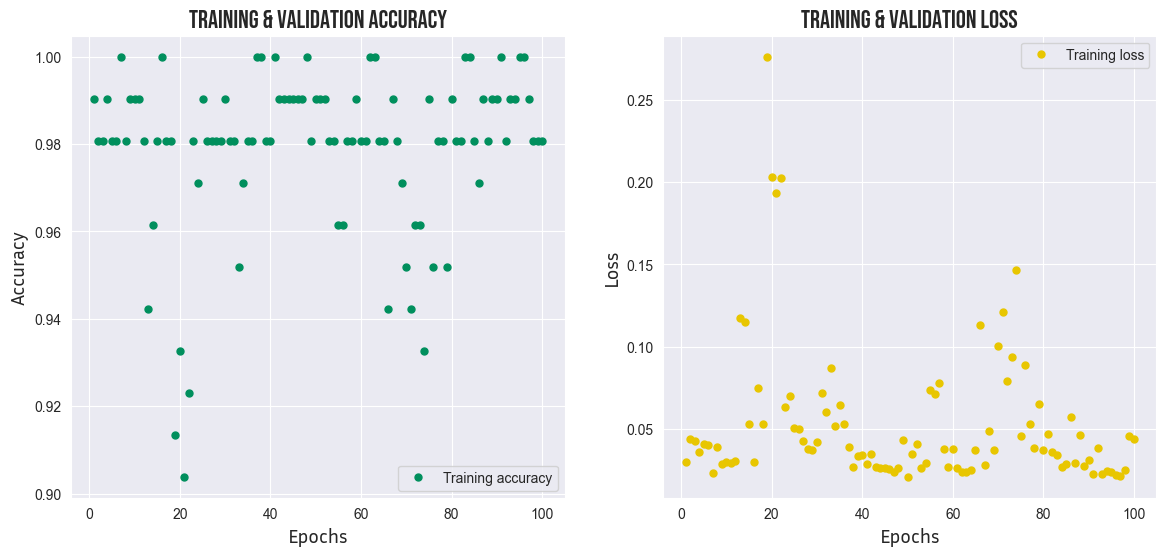

In [52]:
import matplotlib.pyplot as plt

history = NN.fit(X_train, y_train, batch_size=20, epochs=100, verbose=1)
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy', markersize=5, color=colors[10])
ax[0].set_title('Training & Validation Accuracy', fontsize=18, font="Bebas Neue")
ax[0].set_xlabel('Epochs', fontsize=14, font="Inria Sans")
ax[0].set_ylabel('Accuracy', fontsize=14, font="Inria Sans")
ax[0].legend()

ax[1].plot(epochs, loss_values, 'bo', label='Training loss', markersize=5, color=colors[8])
ax[1].set_title('Training & Validation Loss', fontsize=18, font="Bebas Neue")
ax[1].set_xlabel('Epochs', fontsize=14, font="Inria Sans")
ax[1].set_ylabel('Loss', fontsize=14, font="Inria Sans")
ax[1].legend()

plt.show()

In [74]:
y_hat = NN.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [75]:
y_hat = [np.argmax(i) for i in y_hat]

y_hat[:5]

[0, 2, 0, 0, 1]

In [76]:
print(f"Accuracy of the Neural Network model is : {round(accuracy_score(y_test, y_hat) * 100, 3)}")

Accuracy of the Neural Network model is : 97.778


In [103]:
NN.get_weights()[0]

array([[-0.02661216, -0.08441656,  0.07458454,  0.22444524, -0.0442581 ,
        -0.17777678, -0.09683944,  0.10298385,  0.04760253, -0.1339423 ,
        -0.00316902,  0.1643469 , -0.11077   ,  0.18015645,  0.00228095,
        -0.03619816, -0.12804103,  0.01539478,  0.19009858, -0.20506003,
         0.12088265, -0.10290977, -0.13313533,  0.11982007,  0.14836442,
        -0.03999588,  0.02709568, -0.03241366,  0.14952327, -0.05915093,
        -0.1471603 , -0.00780937,  0.20403334,  0.07356437,  0.19122776,
         0.08424199, -0.19937687,  0.06167113,  0.10972293,  0.1804307 ,
         0.08703798, -0.08361606, -0.04398016, -0.07109848, -0.10680226,
        -0.13152325,  0.14321789, -0.09099172, -0.15286821,  0.0295752 ,
        -0.05269957, -0.15989281, -0.11049315, -0.12574688,  0.20787318,
         0.06638795, -0.08478689, -0.20173484,  0.1124142 ,  0.08730607,
         0.14611487,  0.1830483 , -0.01328734,  0.13388394,  0.09954219,
        -0.01103798, -0.18026745,  0.14153138,  0.1

In [107]:
NN.save('NN_Model.h5')

In [111]:
savedModel = tf.keras.models.load_model('NN_Model.h5')
np.argmax(savedModel.predict([[6.0, 2.2, 4.0, 1.0]]))

1/1 [==============================] - 0s 169ms/step


1

In [1]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    SVC(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),
    cv=5)

In [2]:
print(train_scores, valid_scores)

[[0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.9340217  0.94366412 0.92648377 0.91933304 0.929225  ]
 [0.51143526 0.52415737 0.49868907 0.47086988 0.49623503]] [[0.9055033  0.84185935 0.94569793 0.96231017 0.93366144]
 [0.90550088 0.84184574 0.94568969 0.96233172 0.93366806]
 [0.46706558 0.25698974 0.50496293 0.49826404 0.52500014]]


In [24]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)

In [25]:
colors = ['#0FB5AE', '#4046CA', '#F68511', '#DE3D82', '#7E84FA', '#72E06A', '#147AF3', '#7326D3', '#E8C600', '#CB5D00',
          '#008F5D', '#BCE931']

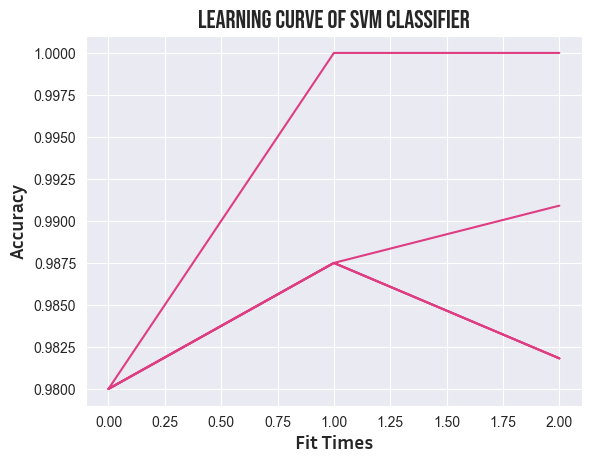

In [26]:
plt.plot(train_scores, color=colors[3])
plt.xlabel("Fit Times", font="Inria Sans", weight="700", size=14)
plt.ylabel("Accuracy", font="Inria Sans", weight="700", size=14)
plt.title("Learning Curve of SVM Classifier", size=18, font="Bebas Neue", weight="700")

plt.show()

In [27]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

train_sizes, train_scores, valid_scores = learning_curve(
    DecisionTreeClassifier(), X, y, train_sizes=[50, 80, 110], cv=5)

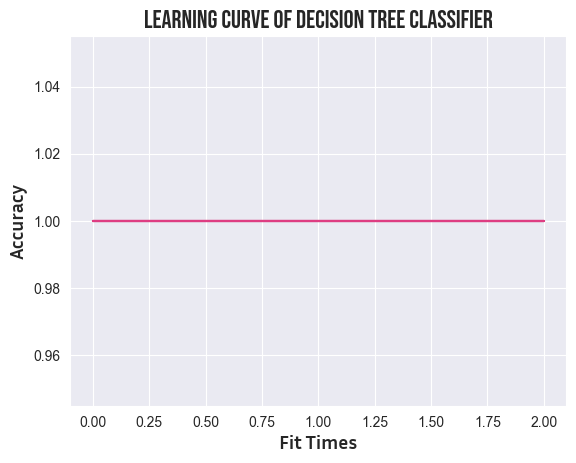

In [29]:
plt.plot(train_scores, color=colors[3])
plt.xlabel("Fit Times", font="Inria Sans", weight="700", size=14)
plt.ylabel("Accuracy", font="Inria Sans", weight="700", size=14)
plt.title("Learning Curve of Decision Tree Classifier", size=18, font="Bebas Neue", weight="700")

plt.show()

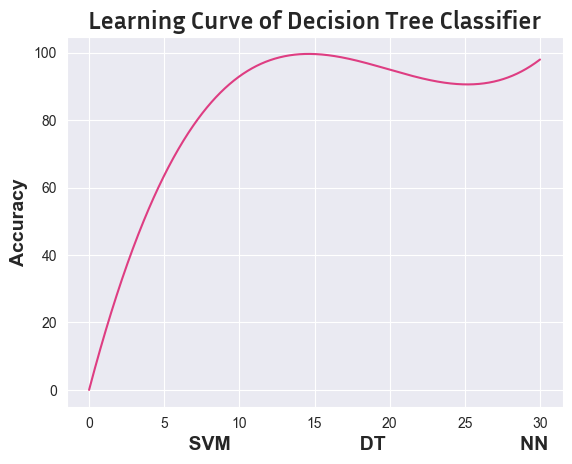

In [44]:
from scipy.interpolate import make_interp_spline

x = np.array([0, 10, 20, 30])
y = np.array([0, 93, 95, 98])

X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(x.min(), x.max(), 1000)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_, color=colors[3])
plt.xlabel("                    SVM                        DT                         NN", weight="600", size=14)
plt.ylabel("Accuracy", weight="600", size=14)
plt.title("Learning Curve of Decision Tree Classifier", size=18, font="Inria Sans", weight="700")

plt.show()